In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [5]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[ 2.1186025e+00],
         [-5.9366614e-01],
         [-9.3685144e-01],
         ...,
         [-4.2827728e-01],
         [ 5.4645956e-01],
         [-2.2470555e-01]],

        [[-1.1589035e+00],
         [ 1.1159000e+00],
         [ 1.8823260e-01],
         ...,
         [ 1.1684203e-01],
         [-4.9270386e-01],
         [-8.5334349e-01]],

        [[ 3.7048125e-01],
         [-1.6822819e+00],
         [-1.7251763e+00],
         ...,
         [ 1.3636123e+00],
         [ 1.0203677e+00],
         [ 5.9408516e-01]],

        ...,

        [[ 1.8992959e+00],
         [-6.6123825e-01],
         [-9.0826786e-01],
         ...,
         [ 8.7631249e-01],
         [ 4.1471517e-01],
         [-5.8348131e-01]],

        [[-2.9716441e-01],
         [ 3.7195146e-01],
         [-9.5895790e-02],
         ...,
         [ 5.2527702e-01],
         [ 2.6959485e-01],
         [-1.0423181e+00]],

        [[ 5.6528229e-01],
         

In [7]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [8]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

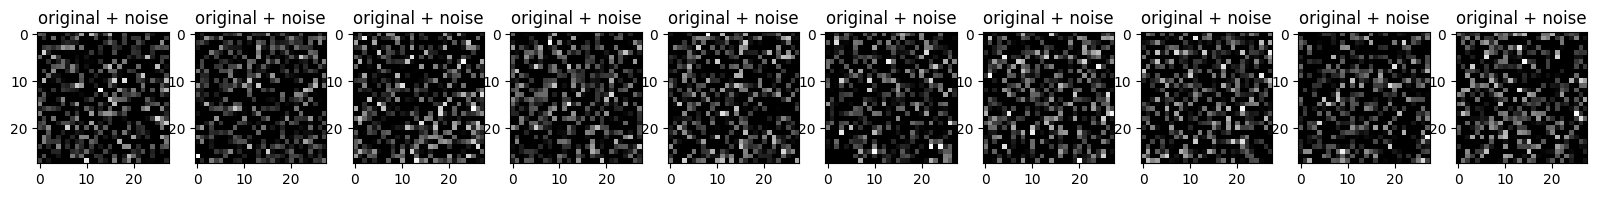

In [9]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [10]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [11]:
autoencoder = Denoise()

In [12]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [13]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - loss: 0.0193 - val_loss: 3.3285e-06
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - loss: 3.2536e-06 - val_loss: 3.2004e-06
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - loss: 3.1920e-06 - val_loss: 3.1826e-06
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - loss: 3.1718e-06 - val_loss: 3.1781e-06
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - loss: 3.1671e-06 - val_loss: 3.1766e-06
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - loss: 3.1886e-06 - val_loss: 3.1761e-06
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - loss: 3.1660e-06 - val_loss: 3.1759e-06
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - loss: 3.1833e-06 - val_loss: 3.1758e-06
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - loss: 3.1620e-06 - val_loss: 3.1757e-06
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - loss: 3.1787e-06 - val_loss: 3.1757e-06
Epoch 11/30
1875/1875 ━

In [14]:
autoencoder.encoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
autoencoder.decoder.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

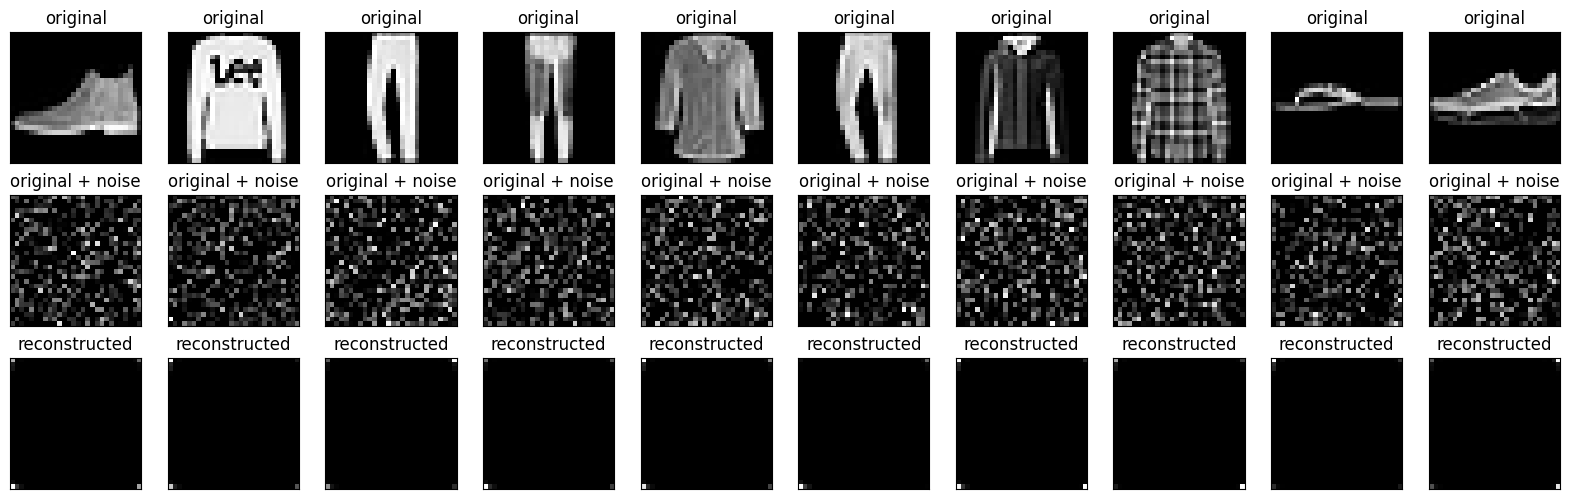

In [17]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Predict using the autoencoder
reconstructed_images = autoencoder.predict(x_test)

# Calculate the Mean Squared Error (MSE) loss between the original and reconstructed images
test_loss = mean_squared_error(x_test.flatten(), reconstructed_images.flatten())
print(f"Test MSE Loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Test MSE Loss: 3.1762665457790717e-06


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - loss: 3.1842e-06 - val_loss: 3.1757e-06
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - loss: 3.1794e-06 - val_loss: 3.1757e-06
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 3.1695e-06 - val_loss: 3.1757e-06
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - loss: 3.1795e-06 - val_loss: 3.1757e-06
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 36ms/step - loss: 3.1822e-06 - val_loss: 3.1757e-06
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - loss: 3.1813e-06 - val_loss: 3.1757e-06
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - loss: 3.1749e-06 - val_loss: 3.1757e-06
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - loss: 3.1746e-06 - val_loss: 3.1757e-06
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - loss: 3.1826e-06 - val_loss: 3.1757e-06
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - loss: 3.1602e-06 - val_loss: 3.1757e-06
Epoch 11/30
1875/18

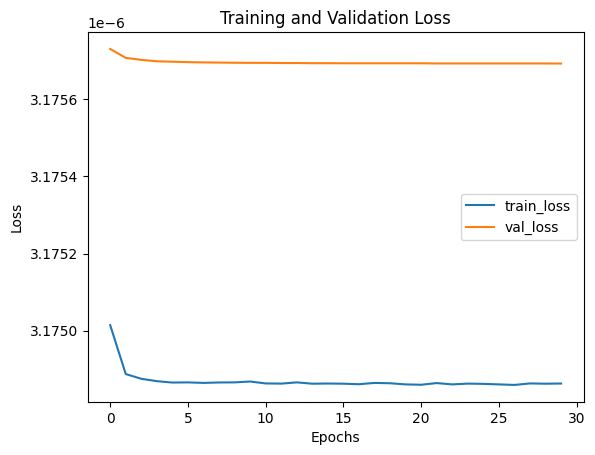

In [19]:
import matplotlib.pyplot as plt

history = autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_train, x_train, epochs=30, validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
